<div style="
    background:black;
    color:white;
    padding:10px;
    border-radius:12px;
    font-size:18px;
    font-weight:bold;
    margin:20px 0;
    text-align:center;
">
AUTOMATED APPROVAL FLOW
</div>

<div style="
    background:#1f77b4;
    color:white;
    padding:10px;
    border-radius:12px;
    font-size:18px;
    font-weight:bold;
    margin:20px 0;
    text-align:left;
    width: 70%;
">
I. VARIABLE UNDERSTANDING
</div>

<div style="
    background:#f2f2f2;
    padding:10px;
    border-radius:8px;
    font-size:18px;
    font-weight:bold;
    margin-top:10px;
    width: 50%;
">
1/ Import relatived Library and overview data
</div>

In [ ]:
# Calculation Function
#-------------------------------------
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Machine Learning & Interpretation
#-------------------------------------
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, brier_score_loss, log_loss, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.calibration import calibration_curve
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import io


# Display
#-------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
import json
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# HTML configuration
#-------------------------------------

def hprint(text, size=15, color="black", bold=False, italic=False, newline=True):
    style = f"font-size:{size}px; color:{color};"

    if bold:
        text = f"<b>{text}</b>"
    if italic:
        text = f"<i>{text}</i>"
    if newline:
        text = text + "<br>"

    display(HTML(f"<span style='{style}'>{text}</span>"))

In [ ]:
# Import File
#-------------------------------------
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

Saving raw_digital.csv to raw_digital.csv


In [ ]:
hprint("--- Data overview ---<br>", bold=True)
df.head()

,campaign_id,campaign_objective,platform,ad_placement,device_type,operating_system,creative_format,creative_size,ad_copy_length,CTA,creative_emotion,creative_age_days,target_audience_age,target_audience_gender,audience_interest_category,income_bracket,purchase_intent_score,retargeting_flag,start_date,quarter,day_of_week,hour_of_day,campaign_day,quality_score,actual_cpc,impressions,clicks,conversions,ad_spend,revenue,bounce_rate,avg_session_duration_seconds,pages_per_session,industry_vertical,budget_tier,CTR,CPC,conversion_rate,CPA,ROAS,profit
0,CAMP_00001,Lead Generation,Facebook,Search,Mobile,Android,Text,728x90,Short,False,Curiosity,72,45-54,Female,Shoppers,<$50K,Medium,False,2024-03-06,1,Wednesday,18,34,5,2.23,66329,402,2,896.46,289.67,67.75,70,2.00,E-commerce,High,0.606,2.23,0.498,448.23,0.32,-606.79
1,CAMP_00002,Engagement,Facebook,Feed,Mobile,iOS,Image,320x50,Long,True,Neutral,62,65+,Female,Business Professionals,$50K-$100K,Medium,False,2024-01-26,1,Friday,6,22,5,2.48,50094,467,5,1158.16,1728.20,63.73,105,2.74,Finance,Medium,0.932,2.48,1.071,231.63,1.49,570.04
2,CAMP_00003,Conversions,Google Ads,Feed,Tablet,iOS,Video,1920x1080,Short,False,Urgency,79,65+,Male,Tech Enthusiasts,<$50K,High,False,2025-05-15,2,Thursday,1,32,4,3.88,10842,112,6,434.56,2903.26,31.93,149,3.97,Healthcare,Low,1.033,3.88,5.357,72.43,6.68,2468.70
3,CAMP_00004,Conversions,LinkedIn,Search,Desktop,iOS,Carousel,1920x1080,Short,False,Joy,57,35-44,All,Shoppers,<$50K,Low,False,2024-07-21,3,Sunday,7,32,4,8.29,7820,123,3,1019.67,502.28,65.52,147,2.49,Education,Medium,1.573,8.29,2.439,339.89,0.49,-517.39
4,CAMP_00005,Brand Awareness,Facebook,Stories,Mobile,iOS,Image,1920x1080,Short,False,Joy,17,25-34,Female,Students,$100K-$200K,Low,False,2025-03-09,1,Sunday,17,52,7,1.41,21436,302,0,425.82,0.00,68.95,81,3.04,SaaS,Low,1.409,1.41,0.000,0.00,0.00,-425.82


In [ ]:
hprint("--- Data info ---<br>", bold=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   campaign_id                   10000 non-null  object 
 1   campaign_objective            10000 non-null  object 
 2   platform                      10000 non-null  object 
 3   ad_placement                  10000 non-null  object 
 4   device_type                   10000 non-null  object 
 5   operating_system              10000 non-null  object 
 6   creative_format               10000 non-null  object 
 7   creative_size                 10000 non-null  object 
 8   ad_copy_length                10000 non-null  object 
 9   CTA                           10000 non-null  bool   
 10  creative_emotion              10000 non-null  object 
 11  creative_age_days             10000 non-null  int64  
 12  target_audience_age           10000 non-null  object 
 13  ta

In [ ]:
hprint("\n--- Data describe ---<br>", bold=True)
print(df.describe())

       creative_age_days       quarter   hour_of_day  campaign_day  \
count         10000.0000  10000.000000  10000.000000  10000.000000   
mean             45.3743      2.419100     11.482500     45.429700   
std              26.1711      1.132424      6.932308     26.071107   
min               1.0000      1.000000      0.000000      1.000000   
25%              22.0000      1.000000      5.000000     23.000000   
50%              45.0000      2.000000     12.000000     45.000000   
75%              68.0000      3.000000     18.000000     68.000000   
max              90.0000      4.000000     23.000000     90.000000   

       quality_score    actual_cpc    impressions        clicks   conversions  \
count   10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean        5.527400      3.290336   70539.223000   1526.436100     65.568800   
std         1.553541      2.453852   91339.733246   2412.164582    183.404876   
min         1.000000      0.300000    5000.00

<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
<strong>1. Profit Distribution is Extremely Slanted:</strong>
The median (50%) profit is only 3,302, but the mean jumps to 24,070.

=> There are a few "super campaigns" (Outliers) that yield huge profits (Max up to $2.75M), while the majority of campaigns are only average. This explains why your model struggles to accurately predict risky situations by looking only at the mean.

<strong>2. Actual Loss Status:</strong>
The minimum profit value is -36,939, and the 25% mark is still positive (209).

=> The number of campaigns actually losing money is less than 25% of the total data. This dataset may be unbalanced and needs further investigation.

<strong>3. Traffic Quality (Bounce Rate & Sessions):</strong>
Bounce Rate is average 52.5%. Levels from 75% up to 65.4%.

=> Traffic quality varies significantly. Cases with a Bounce Rate > 80% are often associated with negative profits. This is an extremely important variable for identifying a "Loss Driver".

<strong>4. Conversion Rate (Conversion & CPA):</strong>
Conversion Rate is average 3.64%, a fairly good number for digital advertising, but the range from 0% to 25% indicates extremely inconsistent quality of creative or landing page content.
</div>

In [ ]:
# Check and Remove Duplicates
#-------------------------------------
duplicates_count = df.duplicated(subset = ['campaign_id']).sum()
if duplicates_count > 0:
  df = df.drop_duplicates(subset = ['campaign_id'], keep = 'first')
  print(f"{duplicates_count} duplicates were droped")
else:
    hprint("<b>No duplicate</b> entries found")

In [ ]:
# Check Unique Value
#-------------------------------------
hprint("\n--- Check Unique Values ---<br>", bold=True)
print(df.nunique())

campaign_id                     10000
campaign_objective                  5
platform                            6
ad_placement                        6
device_type                         3
operating_system                    5
creative_format                     6
creative_size                       6
ad_copy_length                      3
CTA                                 2
creative_emotion                    6
creative_age_days                  90
target_audience_age                 6
target_audience_gender              3
audience_interest_category          6
income_bracket                      4
purchase_intent_score               3
retargeting_flag                    2
start_date                        761
quarter                             4
day_of_week                         7
hour_of_day                        24
campaign_day                       90
quality_score                      10
actual_cpc                       1084
impressions                      9037
clicks      

<div style="
    background:#f2f2f2;
    padding:10px;
    border-radius:8px;
    font-size:18px;
    font-weight:bold;
    margin-top:10px;
    width: 50%;
">
2/ Check data length & correctness
</div>

<div style="
    background:#fafafa;
    padding:10px;
    border-radius:8px;
    font-size:15px;
    font-weight:bold;
    margin-top:10px;
    width: 50%;
">
Check data length & split data for backtesting
</div>

In [ ]:
# Check date range
#-------------------------------------
df["start_date"] = pd.to_datetime(df["start_date"])
start_date = df["start_date"].min()
end_date = df["start_date"].max()

print(f"Data from {start_date} → {end_date}")


# Plit data for backtest
#-------------------------------------
last_year = end_date.year
last_month = end_date.month

df_backtest = df[
                (df["start_date"].dt.year == last_year) &
                (df["start_date"].dt.month == last_month)
                ]

df = df[
        ~(
            (df["start_date"].dt.year == last_year) &
            (df["start_date"].dt.month == last_month)
        )
      ]
print(f"Data backtest: {df_backtest["start_date"].min()} → {df_backtest["start_date"].max()}")
print(f"Remaining data: {df["start_date"].min()} → {df["start_date"].max()}")

Data from 2024-01-01 00:00:00 → 2026-01-30 00:00:00
Data backtest: 2026-01-01 00:00:00 → 2026-01-30 00:00:00
Remaining data: 2024-01-01 00:00:00 → 2025-12-31 00:00:00


In [ ]:
df_backtest.to_csv("data_digital_backtest.csv", index=False)
df_backtest.shape

(429, 41)

<div style="
    background:#fafafa;
    padding:10px;
    border-radius:8px;
    font-size:15px;
    font-weight:bold;
    margin-top:10px;
    width: 50%;
">
Create the Target variable and check its validity
</div>

In [ ]:
# Create Target (1: Profit < 0 | 0: Profit >= 0)
#-------------------------------------
df['is_loss'] = (df['profit'] < 0).astype(int)


# Variable selection
#-------------------------------------
features_input = [
                  'campaign_objective', 'platform', 'ad_placement', 'device_type',
                  'operating_system', 'creative_format', 'creative_size', 'ad_copy_length',
                  'CTA', 'creative_emotion', 'target_audience_age', 'target_audience_gender',
                  'audience_interest_category', 'income_bracket', 'retargeting_flag',
                  'quarter', 'day_of_week', 'industry_vertical', 'budget_tier'
                ]

<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
Carefully selecting input variables ensures the model is predictive rather than merely descriptive of what has already happened. Variables like CPC, CTR, Bounce Rate, etc., are metrics that emerge after the campaign has run; including them will cause data leakage, making the model appear overly accurate but useless for pre-deployment decision-making. Instead, the model should focus on identifying and configurable factors (such as platform, audience, time, ad type, etc.) to assess risk right from the planning stage.
</div>

In [ ]:
# Check logic data
#-------------------------------------
violation_1 = df[df['impressions'] < df['clicks']]
violation_2 = df[df['clicks'] < df['conversions']]
violation_3 = df[(df['revenue'] > 0) & (df['conversions'] == 0)]

print(f"Number of lines violating logic - Impressions < Click: {len(violation_1)}")
print(f"Number of lines violating logic - Click < Conversions: {len(violation_2)}")
print(f"Number of lines violating logic - Revenue > 0 but Conversions = 0): {len(violation_3)}")


# Eliminate illogical errors
#-------------------------------------
df = df.drop(violation_1.index.union(violation_2.index).union(violation_3.index))

Number of lines violating logic - Impressions < Click: 0
Number of lines violating logic - Click < Conversions: 0
Number of lines violating logic - Revenue > 0 but Conversions = 0): 0


<div style="
    background:#fafafa;
    padding:10px;
    border-radius:8px;
    font-size:15px;
    font-weight:bold;
    margin-top:10px;
    width: 55%;
">
Check the outlines and balance of the target variable
</div>


Q1: 201.99
Q3: 16,645.54
IQR: 16,443.56
Lower Bound: -24,463.35
NUpper Bound: 41,310.88
------------------------------------------------------------
Number of Lower Outliers (Mutation Losses): 9
Number of Upper Outliers (Mutation Gains): 1243


------------------------------------------------------------


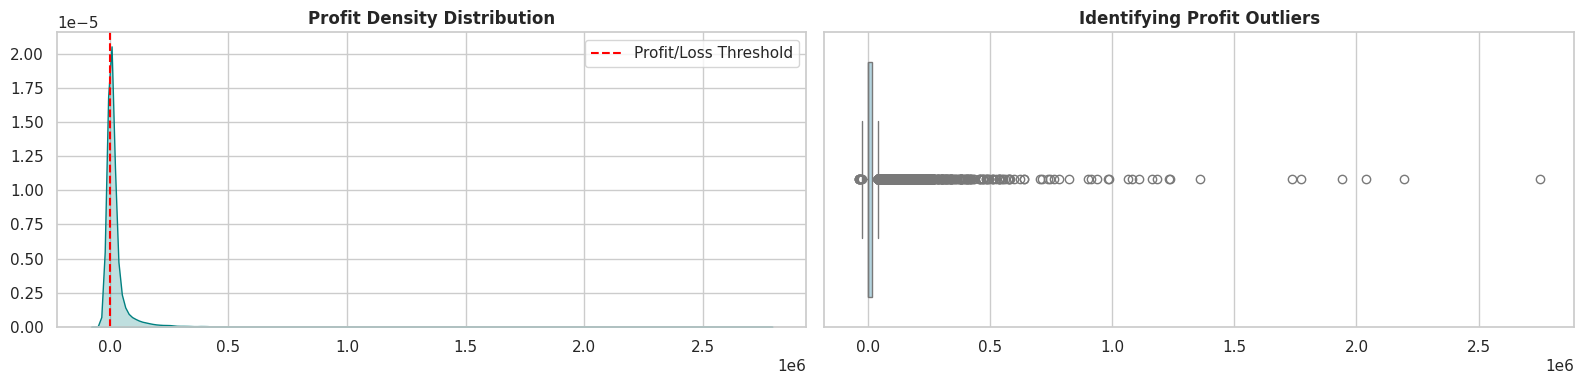

In [ ]:
# Calculate outliers using IQR
#-------------------------------------
Q1 = df['profit'].quantile(0.25)
Q3 = df['profit'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_lower = df[df['profit'] < lower_bound]
outliers_upper = df[df['profit'] > upper_bound]

hprint(f"--- OUTLIERS STATISTICS ---",bold=True)
print("\n"f"Q1: {Q1:,.2f}")
print(f"Q3: {Q3:,.2f}")
print(f"IQR: {IQR:,.2f}")
print(f"Lower Bound: {lower_bound:,.2f}")
print(f"NUpper Bound: {upper_bound:,.2f}")
print("-" * 60)
print(f"Number of Lower Outliers (Mutation Losses): {len(outliers_lower)}")
print(f"Number of Upper Outliers (Mutation Gains): {len(outliers_upper)}")
hprint(f"Total Outliers: {len(outliers_lower) + len(outliers_upper)} (account <b>{(len(outliers_lower) + len(outliers_upper))/len(df) * 100 : .2f}%</b> data)")
print("-" * 60)


# Visualize outliers
#-------------------------------------
plt.figure(figsize=(16, 4))

# KDE
plt.subplot(1, 2, 1)
sns.kdeplot(df['profit'], shade = True, color = "teal")
plt.axvline(0, color = 'red', linestyle = '--', label = 'Profit/Loss Threshold')
plt.title('Profit Density Distribution', fontweight = 'bold')
plt.xlabel("")
plt.ylabel("")
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x = df['profit'], color = "lightblue")
plt.xlabel("")
plt.title('Identifying Profit Outliers',fontweight = 'bold')

plt.tight_layout()
plt.show()

<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
<strong>Extreme Positive Skew:</strong> Data density is overwhelmingly concentrated at low profit levels (around the 0 mark). The KDE curve is steep at the beginning and has a very long tail to the right.<br><br><strong>Outlier Dominance:</strong> 50% of the data (IQR) falls within a narrow range. However, "super profitable" (Upper Outliers) extend all the way to $2.5M, indicating that overall profits are driven by a small group of campaigns.<br><br><strong>Risk Imbalance:</strong> The number of high-profit campaigns (1,243 cases) significantly outweighs the number of low-profit campaigns (9 cases). This suggests the system has the potential to generate extremely large profits from "super campaigns," while high-loss campaigns are very rare.
</div>

In [ ]:
# Check lower_bound_outliers
#-------------------------------------
low_outliers = df[df['profit'] < lower_bound]

comparison = pd.DataFrame({
    'Umder_lower_bound': low_outliers[['impressions', 'clicks', 'quality_score', 'bounce_rate']].mean().round(2),
    'Remaining data': df[df['profit'] >= lower_bound][['impressions', 'clicks', 'quality_score', 'bounce_rate']].mean().round(2)
})

hprint("--- OUTLINER'S CHARACTERISTICS COMPARED TO THE REST---""\n", bold = True)
print("-" * 60)
display(comparison)

------------------------------------------------------------


,Umder_lower_bound,Remaining data
impressions,319495.11,70443.78
clicks,6865.33,1532.86
quality_score,6.11,5.53
bounce_rate,63.29,52.59


<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
    
- Exceptional Impressions & Clicks: Impressions and clicks are 4.5 times higher than the average for the entire dataset. This indicates that these campaigns received very large budgets (Large Scale).
    
- Higher-than-average Quality Score (6.11) (5.52): A Quality Score > 6 is never a data error or system crash. It shows that the ads are still displaying well and the content is still relevant to users.

- Bounce Rate (63.29%): Approximately 10% higher than the average (52.5%).

<strong>=> This is a real loss, not a data error.</strong>
</div>

In [ ]:
# Check for imbalances
#-------------------------------------
imbalance_ratio = df['is_loss'].value_counts(normalize=True)

hprint("--- BALANCE RATIO OF THE TARGET VARIABLE ---", bold=True)
print("\n"f"Profit (0): {imbalance_ratio[0] * 100 : .2f}%")
print(f"Loss (1): {imbalance_ratio[1] * 100 : .2f}%")


Profit (0):  78.23%
Loss (1):  21.77%


<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
The data shows some skewing, but it's not too extreme and is acceptable without further processing.
</div>

<div style="
    background:#fafafa;
    padding:10px;
    border-radius:8px;
    font-size:15px;
    font-weight:bold;
    margin-top:10px;
    width: 50%;
">
Check seasonality
</div>

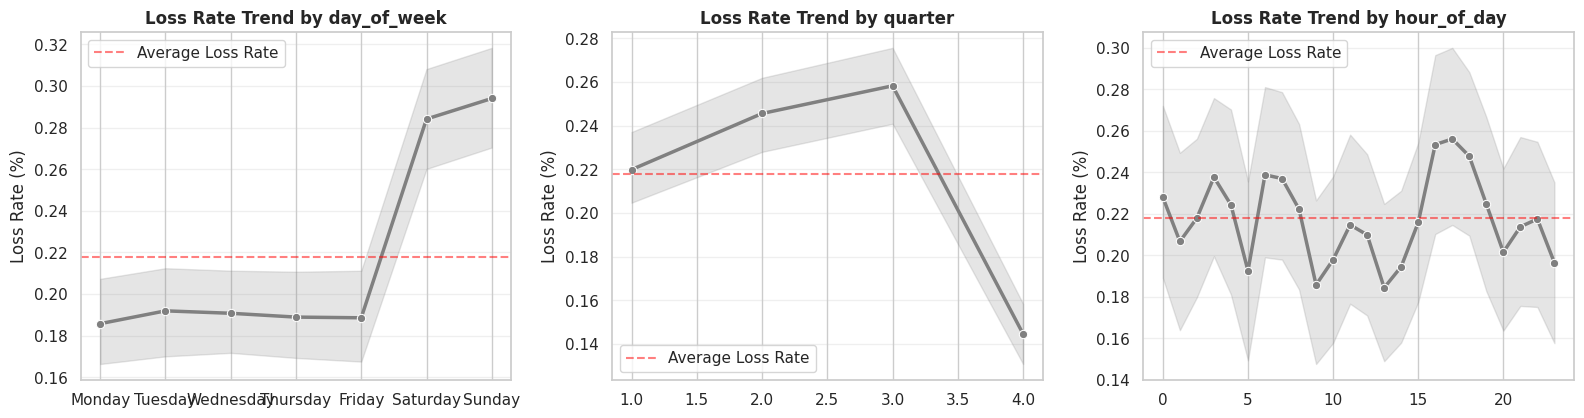

In [ ]:
# Nonlinearity testing for time variables (Improved Version)
#-------------------------------------
num_features = ['day_of_week', 'quarter', 'hour_of_day']
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_order, ordered=True)

plt.figure(figsize = (16, 8))

for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)

    sns.lineplot(x = col, y = 'is_loss', data = df.sort_values(col),
                 color = 'grey', linewidth = 2.5, marker = 'o', markersize = 6)

    plt.axhline(df['is_loss'].mean(), color = 'red', linestyle = '--', alpha = 0.5, label = 'Average Loss Rate')

    plt.title(f'Loss Rate Trend by {col}', fontweight = 'bold')
    plt.xlabel("")
    plt.ylabel("Loss Rate (%)", fontsize = 12)
    plt.grid(True, axis = 'y', alpha = 0.3)
    plt.legend()

plt.tight_layout()
plt.show()

<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
<strong>Loss Rate Trend</strong>

- Day of week: Low and stable loss risk from Monday to Friday (~18-19%), but spikes extremely high on Saturday and Sunday (reaching 30%).

- Quarter: Loss rate gradually increases from Q1, peaking in Q3 and dropping lowest in Q4 (~14%).

- Hour of day: Highly volatile, but with two distinct risk peaks around noon (11 am) and evening (5 pm-6 pm).

=> Campaigns running on weekends or in Q3 have the highest probability of actual losses.
</div>

<div style="
    background:#1f77b4;
    color:white;
    padding:10px;
    border-radius:12px;
    font-size:18px;
    font-weight:bold;
    margin:20px 0;
    text-align:left;
    width: 70%;
">
II. DATA PREPARATION AND MODEL CONSTRUCTION
</div>

<div style="
    background:#f2f2f2;
    padding:10px;
    border-radius:8px;
    font-size:18px;
    font-weight:bold;
    margin-top:10px;
    width: 50%;
">
1/ Encoding & check multicollinearity
</div>

In [ ]:
# Nonlinearity testing for time variables (Improved Version)
#-------------------------------------
vif = pd.get_dummies(df[features_input], drop_first=True)

vif = vif.astype(float)
vif.replace([np.inf, -np.inf], np.nan, inplace=True)
vif.dropna(inplace = True)


# Check VIF
#-------------------------------------
vif_total = pd.DataFrame()
vif_total["feature"] = vif.columns
vif_total["VIF"] = [variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])]

display(vif_total.sort_values(by = "VIF", ascending = False))

,feature,VIF
2,quarter,5.625459
6,campaign_objective_Lead Generation,4.982723
4,campaign_objective_Conversions,4.336990
12,ad_placement_Feed,3.643292
3,campaign_objective_Brand Awareness,3.314714
...,...,...
18,device_type_Tablet,1.288606
44,target_audience_age_65+,1.207784
63,industry_vertical_Gaming,1.195553
28,creative_size_1200x628,1.185777


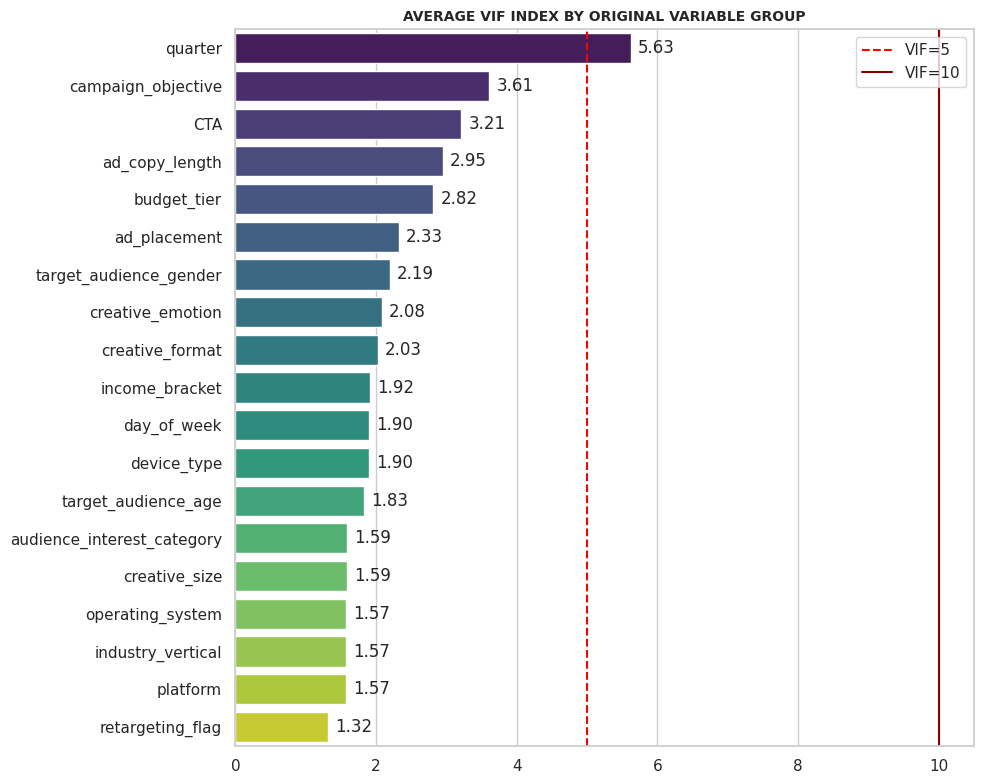

In [ ]:
# Grouping VIF based on the initial features_input list
#-------------------------------------
def map_to_original(feature_name, original_features):
    for original in original_features:
        if feature_name.startswith(original):
            return original
    return "Other"

vif_total["Group"] = vif_total["feature"].apply(lambda x: map_to_original(x, features_input))

vif_grouped = vif_total.groupby("Group")["VIF"].mean().sort_values(ascending=False).reset_index()


# VIF visualization
#-------------------------------------
plt.figure(figsize = (10, 8))
ax = sns.barplot(x = "VIF", y = "Group", data = vif_grouped, palette = "viridis")

plt.axvline(x = 5, color = 'red', linestyle = '--', label = 'VIF=5')
plt.axvline(x = 10, color = 'darkred', linestyle = '-', label = 'VIF=10')

plt.title("AVERAGE VIF INDEX BY ORIGINAL VARIABLE GROUP", fontsize = 10, fontweight = 'bold')
plt.xlabel("")
plt.ylabel("")
plt.legend()

# Add numerical values ​​to the end of each column
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',
                (p.get_width() + 0.1, p.get_y() + p.get_height()/2),
                va = 'center')

plt.tight_layout()
plt.show()

<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
All variables have indices around the VIF mark of 5, so no multicollinearity handling is needed.
</div>

<div style="
    background:#f2f2f2;
    padding:10px;
    border-radius:8px;
    font-size:18px;
    font-weight:bold;
    margin-top:10px;
    width: 50%;
">
2/ Build basic model & tuning
</div>

In [ ]:
# Prepare data for training and testing.
#-------------------------------------
X = vif
y = df['is_loss']

X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size = 0.2,
        random_state = 42,
        stratify = y
    )

print(f"Number of Train samples: {len(X_train)}")
print(f"Number of Test samples: {len(X_test)}")

Number of Train samples: 7656
Number of Test samples: 1915


<div style="
    background:#fafafa;
    padding:10px;
    border-radius:8px;
    font-size:15px;
    font-weight:bold;
    margin-top:10px;
    width: 50%;
">
Baseline Model building
</div>

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1498
           1       0.72      0.45      0.55       417

    accuracy                           0.84      1915
   macro avg       0.79      0.70      0.73      1915
weighted avg       0.83      0.84      0.83      1915

------------------------------------------------------------
Brier Score.      : 0.1127
Log-Loss          : 0.3580
------------------------------------------------------------
Actual Loss ratio              : 0.22
Avg prediction probability     : 0.23




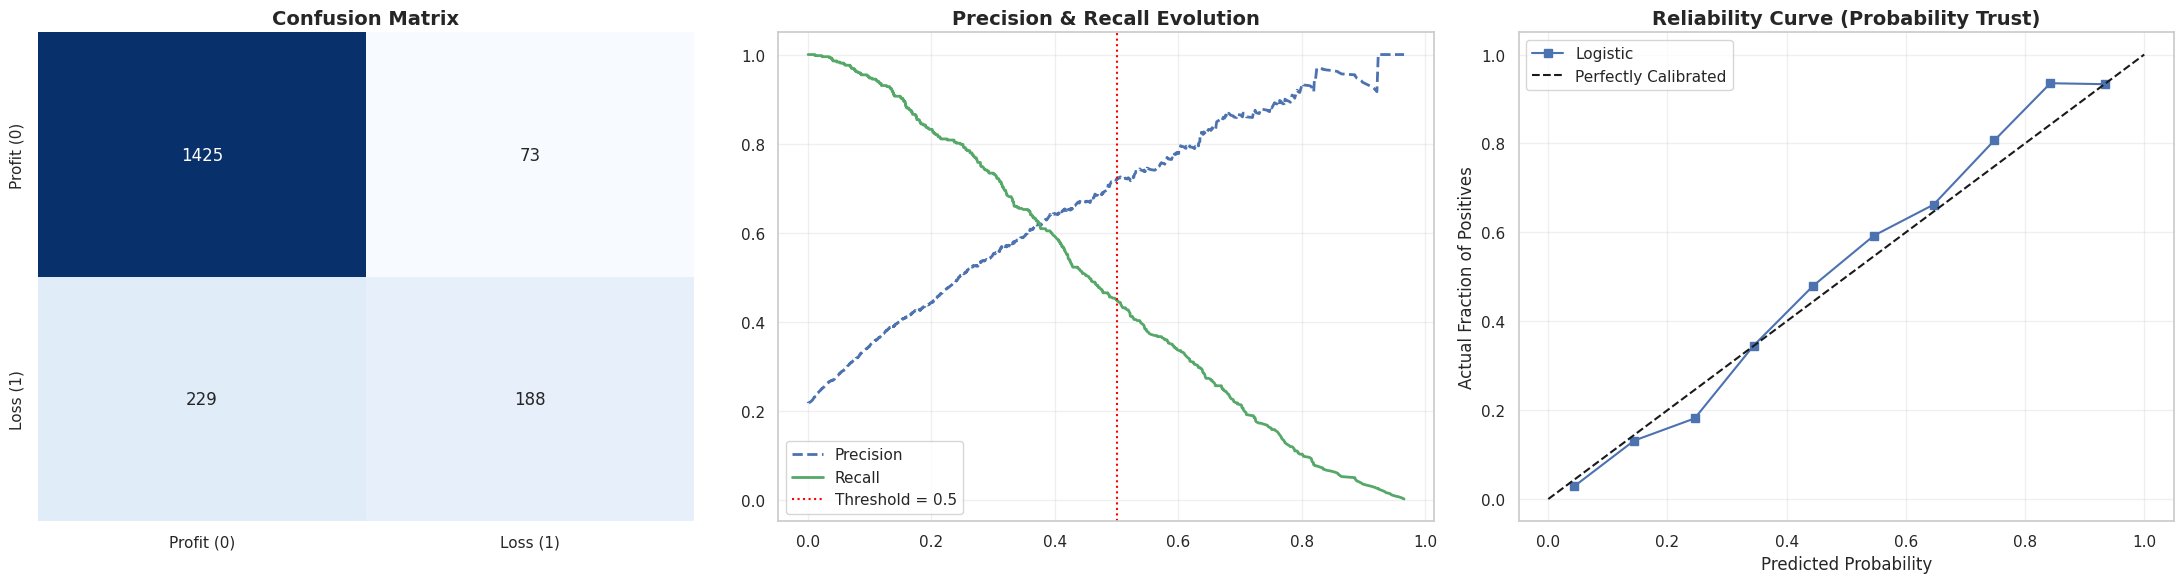

In [ ]:
# Train model
#-------------------------------------
model_log = LogisticRegression(
                            max_iter = 2000,
                            random_state = 42,
                            penalty = "l2",
                            C = 0.5
                           )
model_log.fit(X_train, y_train)

y_pred_log = model_log.predict(X_test)
y_prob_log = model_log.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_log)


# Calculate probabilistic reliability
#-------------------------------------
brier_score = brier_score_loss(y_test, y_prob_log)
logloss_val = log_loss(y_test, y_prob_log)
prob_true, prob_pred = calibration_curve(y_test, y_prob_log, n_bins=10)


# Summary of results
#-------------------------------------
hprint("\n""--- LOGISTIC MODEL PERFORMANCE ---", bold=True)
print("-" * 60)
print(classification_report(y_test, y_pred_log))
print("-" * 60)
print(f"Brier Score.      : {brier_score:.4f}")
print(f"Log-Loss          : {logloss_val:.4f}")
print("-" * 60)
print(f"Actual Loss ratio              : {y_test.mean().round(2)}")
print(f"Avg prediction probability     : {y_prob_log.mean().round(2)}")
print('\n')


# Results visualization
#-------------------------------------
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (22, 6))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', ax = ax1, cbar = False)
ax1.set_title("Confusion Matrix", fontweight = 'bold', fontsize = 14)
ax1.set_xticklabels(['Profit (0)', 'Loss (1)']); ax1.set_yticklabels(['Profit (0)', 'Loss (1)'])

# Precision & Recall vs Threshold
ax2.plot(thresholds, precisions[:-1], "b--", label = "Precision", linewidth = 2)
ax2.plot(thresholds, recalls[:-1], "g-", label = "Recall", linewidth = 2)
ax2.axvline(0.5, color = "red", linestyle = ":", label = "Threshold = 0.5")
ax2.set_title("Precision & Recall Evolution", fontweight = 'bold', fontsize = 14)
ax2.legend(); ax2.grid(True, alpha=0.3)

# Reliability Curve (check Calibration)
ax3.plot(prob_pred, prob_true, "s-", label="Logistic")
ax3.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated") # Đường lý tưởng
ax3.set_title("Reliability Curve (Probability Trust)", fontweight = 'bold', fontsize = 14)
ax3.set_xlabel("Predicted Probability")
ax3.set_ylabel("Actual Fraction of Positives")
ax3.legend(); ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
"><strong>Reliability Curve:</strong>
The Reliability Curve closely follows the 45-degree diagonal. This indicates that the model does not need further calibration. If the model reports a loss probability of 0.6 (60%), then in reality the loss rate is also approximately 60%.

<br><strong>Briber Score</strong>: This is a fairly good number (the closer to 0, the better). It shows that the discrepancy between the forecast and reality is low.

<strong>Average Prediction Probability vs Actual Loss Ratio:</strong> These two numbers are almost identical. The model is not biased despite the unbalanced data.

<strong>Analysis of the "Precision & Recall Evolution" Curve</strong>
In this problem, the accuracy of the probability (Calibration) is more important than Precision or Recall because it directly determines the economic efficiency when setting operating thresholds. Because the goal is to optimize net profit, the model needs to provide a realistic probability figure so that businesses can balance accepting risk or missing out. If the probability is inaccurate, automated decisions to reject or pass will no longer reflect expected value, leading to actual revenue losses even if the classification metrics appear high.
</div>

<div style="
    background:#fafafa;
    padding:10px;
    border-radius:8px;
    font-size:15px;
    font-weight:bold;
    margin-top:10px;
    width: 55%;
">
Check importance levels & filter out variables
</div>

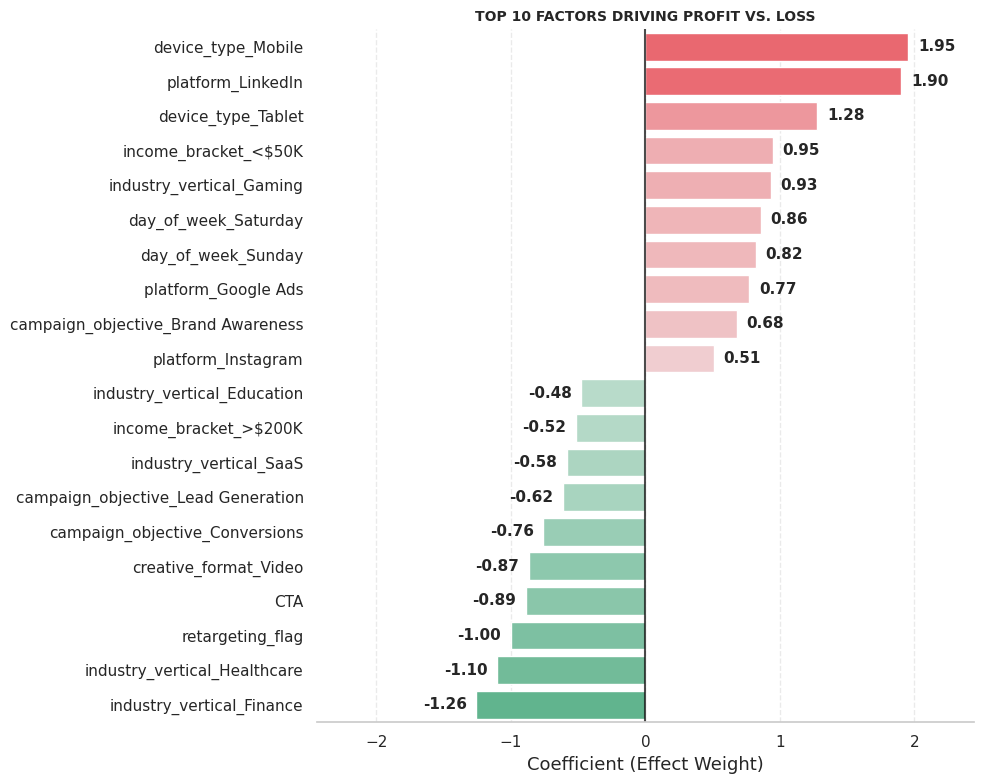

In [ ]:
# Select the top 10 most influential variables
#-------------------------------------
feature_names = X_train.columns
coef = model_log.coef_[0]
summary_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})
summary_df = summary_df.sort_values(by='Coefficient', ascending=False)

top_loss = summary_df.head(10)
top_profit = summary_df.tail(10)
plot_df = pd.concat([top_loss, top_profit]).sort_values(by = 'Coefficient', ascending = False)

# Coefficient visualization
#-------------------------------------
palette = sns.diverging_palette(140, 10, s = 100, l = 60, as_cmap = True)

v_limit = max(abs(plot_df['Coefficient'].min()), abs(plot_df['Coefficient'].max()))
custom_colors = [palette((x + v_limit) / (2 * v_limit)) for x in plot_df['Coefficient']]

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Coefficient', y = 'Feature', data = plot_df, palette = custom_colors)

plt.axvline(x = 0, color = 'black', lw = 1.5, alpha = 0.7)
plt.title("TOP 10 FACTORS DRIVING PROFIT VS. LOSS", fontsize = 10, fontweight = 'bold')
plt.xlabel("Coefficient (Effect Weight)", fontsize = 13)
plt.ylabel("")
plt.grid(axis = 'x', linestyle = '--', alpha = 0.4)

# Add numerical values ​​to the beginning of each column
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
                f'{width:.2f}'
                ,(width, p.get_y() + p.get_height() / 2)
                ,ha = 'left' if width > 0 else 'right'
                ,va = 'center'
                ,xytext = (7 if width > 0 else -7, 0)
                ,textcoords = 'offset points'
                ,fontsize = 11, fontweight = 'bold'
                )

plt.xlim(-v_limit * 1.25, v_limit * 1.25)
sns.despine(left = True, bottom = False)

plt.tight_layout()
plt.show()

<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
<strong>1. Analyzing Factors Driving LOSS (Red Column - Coef > 0)</strong><br><br>

- Devices (Mobile, Tablet): These are the highest risk factors (coefficients of 1.95 and 1.28 respectively). The user experience on mobile may not be optimized for conversion, or mobile users may exhibit "fast browsing" behavior, resulting in lower profitability.

- Platform (LinkedIn): LinkedIn is currently a "danger zone" (Coef = 1.91). This platform is not very suitable for B2B advertising.

- Time (Saturday, Sunday): Running ads on weekends shows a trend of higher losses compared to weekdays.

<strong>2. Analyzing Factors Driving PROFIT (Green Column - Coef < 0)</strong>

- Industry (Finance, Healthcare): These are the factors with the most positive impact on generating profit.

- Tactics (retargeting_flag): Using Retargeting (Coef = -1.00) is an extremely effective tactic to reduce the risk of losses.

- Format (creative_format_Video, CTA): Clear videos and call-to-action (CTA) buttons help keep the campaign on the right track to profitability.
</div>

<div style="
    background:#fafafa;
    padding:10px;
    border-radius:8px;
    font-size:15px;
    font-weight:bold;
    margin-top:10px;
    width: 50%;
">
Coefficient with Grouping
</div>

In [ ]:
# Coefficient visualization
#-------------------------------------
results = []

for base_feat in features_input:
    cols_to_permute = [c for c in X_train.columns if c.startswith(base_feat)]
    if not cols_to_permute:
        continue

    X_test_permuted = X_test.copy()
    X_test_permuted[cols_to_permute] = np.random.permutation(X_test_permuted[cols_to_permute].values)

    # Calculate the drop in Score (using probability deviation).
    y_prob_permuted = model_log.predict_proba(X_test_permuted)[:, 1]
    loss_increase = log_loss(y_test, y_prob_permuted) - log_loss(y_test, y_prob_log)

    results.append({'Original_Feature': base_feat, 'Importance_Score': loss_increase})

# Result
importance_df = pd.DataFrame(results).sort_values(by='Importance_Score', ascending = False)

hprint("\n""--- FEATURES IMPORTANCE ---", bold = True)
display(importance_df)

,Original_Feature,Importance_Score
3,device_type,0.088399
1,platform,0.055002
17,industry_vertical,0.046891
0,campaign_objective,0.043421
13,income_bracket,0.028084
8,CTA,0.026900
14,retargeting_flag,0.021748
16,day_of_week,0.019331
5,creative_format,0.015727
18,budget_tier,0.004489


<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
  
The coeficients make into 3 groups based on Importance_Score (the degree to which they increase Log-loss when swapped):

<strong>- "Backbone" (device_type):</strong> This is the most important variable. If information about the device is lost, the model's predictive ability will decrease most significantly.

<strong>- "High Contribution" Group (0.06 < score < 0.01):</strong> Second in importance, confirming that the channel, time, and target audience are crucial factors.

<strong>- "Low Impact" Group (0.01 < score < 0.001):</strong> This group has a weak impact, but is still necessary for the model to capture additional characteristics without causing overfitting.

"Remaining Group": No impact on the model => filter out.
</div>

In [ ]:
# Variables filter out
#-------------------------------------
effective_features = [
                      'device_type', 'industry_vertical', 'platform', 'campaign_objective',
                      'income_bracket', 'retargeting_flag', 'CTA', 'creative_format', 'day_of_week',
                      'budget_tier', 'ad_placement', 'target_audience_age'
                      ]

cols_to_keep = []
for feat in effective_features:
    cols_to_keep.extend([c for c in X_train.columns if c.startswith(feat)])

X_train_reduced = X_train[cols_to_keep]
X_test_reduced = X_test[cols_to_keep]

hprint(f"Number of columns after removal: <b>{X_train_reduced.shape[1]}</b> (before: {X_train.shape[1]})")

<div style="
    background:#fafafa;
    padding:10px;
    border-radius:8px;
    font-size:15px;
    font-weight:bold;
    margin-top:10px;
    width: 50%;
">
Tuning model
</div>


Metric                         | Baseline (Full)    | Tuned (Reduced)   
---------------------------------------------------------------------------
Log-Loss                       | 0.35805            | 0.35849           
Brier Score                    | 0.11265            | 0.11283           
Best Hyperparameters           | Default (C=0.5)    | {'C': 0.5, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
---------------------------------------------------------------------------


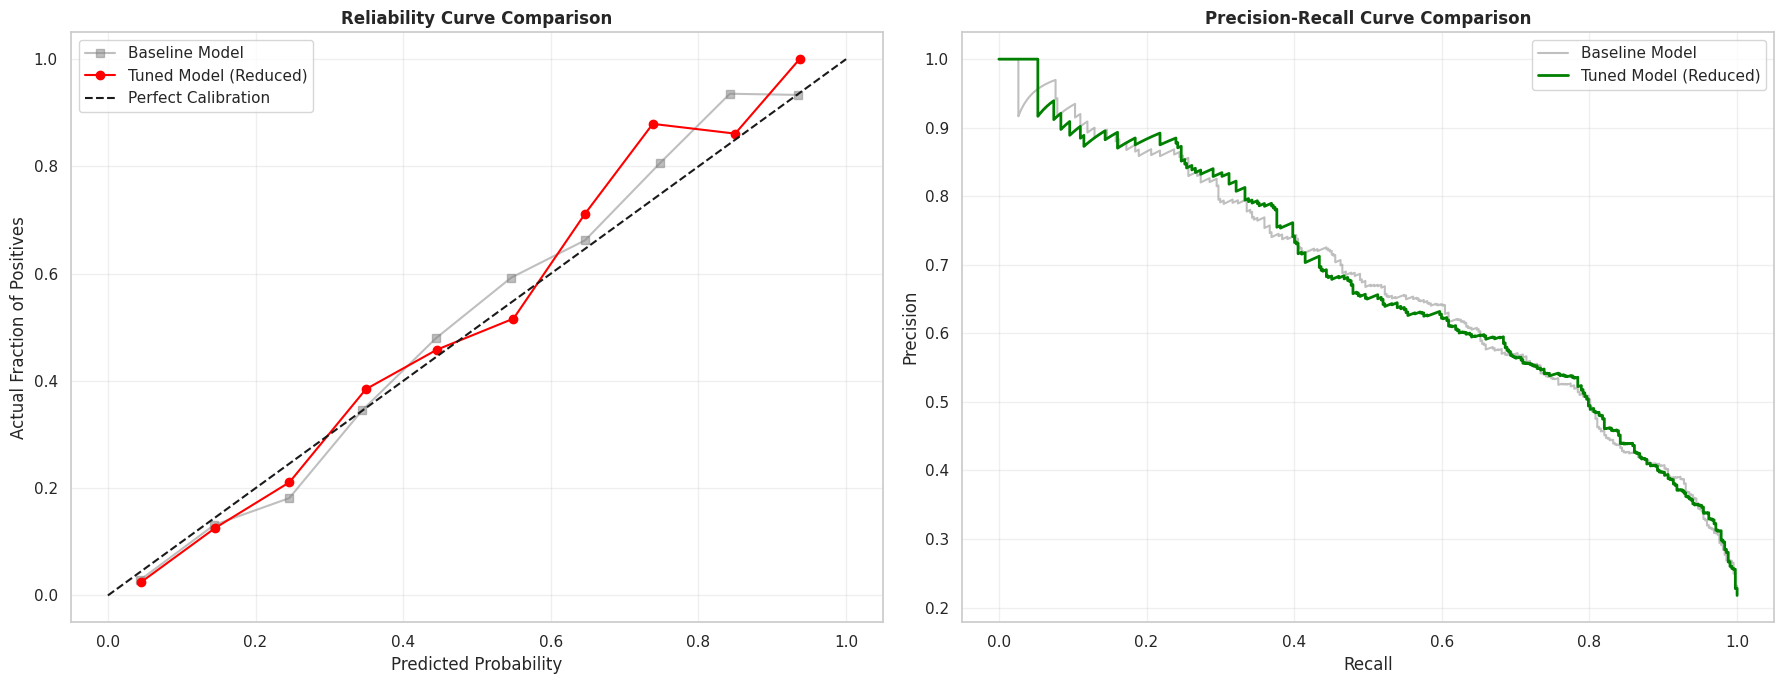

In [ ]:
# Tuning model in new features input list
#-------------------------------------
param_grid = {
    'C': [0.1, 0.3, 0.5, 0.7, 0.8],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight' : ['balanced', None]
}

grid_search = GridSearchCV(LogisticRegression(max_iter = 2000, random_state = 42), param_grid, cv = 5, scoring = 'neg_log_loss')
grid_search.fit(X_train_reduced, y_train)

best_model = grid_search.best_estimator_
y_prob_tuned = best_model.predict_proba(X_test_reduced)[:, 1]
y_pred_tuned = best_model.predict(X_test_reduced)


# Calculate probabilistic reliability
#-------------------------------------
# Baseline model
brier_old = brier_score_loss(y_test, y_prob_log)
logloss_old = log_loss(y_test, y_prob_log)
prob_true_old, prob_pred_old = calibration_curve(y_test, y_prob_log, n_bins=10)

# Tuned model
brier_tuned = brier_score_loss(y_test, y_prob_tuned)
logloss_tuned = log_loss(y_test, y_prob_tuned)
prob_true_tuned, prob_pred_tuned = calibration_curve(y_test, y_prob_tuned, n_bins=10)


# Summary of results
#-------------------------------------
hprint("\n""--- MODEL VALIDATION: BASELINE VS. TUNED ---", bold=True)
print("\n"f"{'Metric':<30} | {'Baseline (Full)':<18} | {'Tuned (Reduced)':<18}")
print("-" * 75)
print(f"{'Log-Loss':<30} | {logloss_old:<18.5f} | {logloss_tuned:<18.5f}")
print(f"{'Brier Score':<30} | {brier_old:<18.5f} | {brier_tuned:<18.5f}")
print(f"{'Best Hyperparameters':<30} | {'Default (C=0.5)':<18} | {str(grid_search.best_params_):<18}")
print("-" * 75)


# Results visualization
#-------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Reliability Curve comparision
ax1.plot(prob_pred_old, prob_true_old, "s-", color = "grey", alpha = 0.5, label = "Baseline Model")
ax1.plot(prob_pred_tuned, prob_true_tuned, "s-", color = "red", marker = 'o', label = "Tuned Model (Reduced)")
ax1.plot([0, 1], [0, 1], "k--", label = "Perfect Calibration")
ax1.set_title("Reliability Curve Comparison", fontweight = 'bold')
ax1.set_xlabel("Predicted Probability")
ax1.set_ylabel("Actual Fraction of Positives")
ax1.legend(); ax1.grid(True, alpha = 0.3)

# Precision-Recall Curve comparision
p_old, r_old, _ = precision_recall_curve(y_test, y_prob_log)
p_new, r_new, _ = precision_recall_curve(y_test, y_prob_tuned)

ax2.plot(r_old, p_old, color = "gray", alpha = 0.5, label="Baseline Model")
ax2.plot(r_new, p_new, color = "green", linewidth = 2, label = "Tuned Model (Reduced)")
ax2.set_title("Precision-Recall Curve Comparison", fontweight = 'bold')
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")
ax2.legend(); ax2.grid(True, alpha = 0.3)

plt.tight_layout()
plt.show()

<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
">
The fact that the model chooses Penalty L1 (Lasso) with a low C coefficient (0.5) shows that the system is performing extremely strong "filtering". It actively removes noise from weak variables to focus on "core" variables. Although this model has a slightly lower technical index, it will be extremely stable in practice because it is not dependent on the filtered junk variables.
</div>

<div style="
    background:#f2f2f2;
    padding:10px;
    border-radius:8px;
    font-size:18px;
    font-weight:bold;
    margin-top:10px;
    width: 50%;
">
3/ Find the optimal threshold point
</div>

<div style="
    background:#fafafa;
    padding:10px;
    border-radius:8px;
    font-size:15px;
    font-weight:bold;
    margin-top:10px;
    width: 50%;
">
Find the optimal threshold
</div>

Average interest (Robust): 22144.38
Average loss:           -1704.81




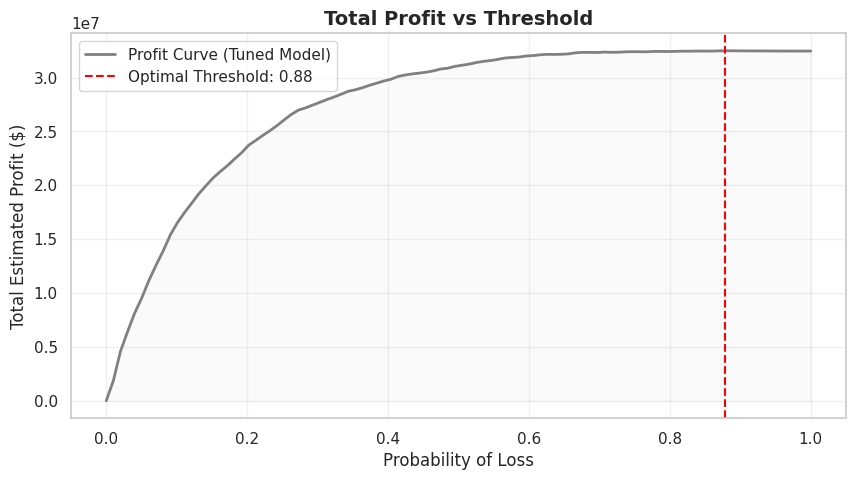

In [ ]:
# Outliner handling
#-------------------------------------
wins = df[df['profit'] > 0]['profit']
losses = df[df['profit'] < 0]['profit']

upper_limit = wins.quantile(0.95)
wins_clipped = wins.clip(upper=upper_limit)

profit_per_win_robust = wins_clipped.mean()
loss_per_fail_robust = losses.mean()

hprint(f"<br>--- ROBUST ECONOMIC CHARACTERISTICS ---", bold=True)
print(f"Average interest (Robust): {profit_per_win_robust:.2f}")
print(f"Average loss:           {loss_per_fail_robust:.2f}")
print("\n")


# Calculate maximum profit margin
#-------------------------------------
# Caculate Profit Curve base on Y_PROB_TUNED
thresholds_range = np.linspace(0, 1, 100)
total_profits_tuned = []

for t in thresholds_range:

    # Pass case:
    tn = ((y_prob_tuned < t) & (y_test == 0)).sum()
    fn = ((y_prob_tuned < t) & (y_test == 1)).sum()

    current_profit = (tn * profit_per_win_robust) + (fn * loss_per_fail_robust)
    total_profits_tuned.append(current_profit)


# Find the optimal threshold (The Anchor) and the safe margin
#-------------------------------------
best_threshold_f = thresholds_range[np.argmax(total_profits_tuned)]
max_profit = max(total_profits_tuned)


# Results visualization
#-------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(thresholds_range, total_profits_tuned, color = 'grey', linewidth = 2, label = 'Profit Curve (Tuned Model)')
plt.fill_between(thresholds_range, total_profits_tuned, color = 'lightgrey', alpha = 0.1)

plt.axvline(best_threshold_f, color = 'red', linestyle = '--', label = f'Optimal Threshold: {best_threshold_f:.2f}')

plt.title("Total Profit vs Threshold", fontweight = 'bold', fontsize = 14)
plt.xlabel("Probability of Loss")
plt.ylabel("Total Estimated Profit ($)")
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()

<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
"><strong>Maximum Profit Equilibrium Point:</strong> This is the point where the profit curve reaches its highest peak. Blocking all campaigns with a probability of loss greater than 0.88 will maximize the system's overall profit.<br><br>
<strong>Economic Boundary:</strong> At 0.88, the profit margin from remaining profitable campaigns is sufficient to offset the risk from losing campaigns. Lowering this threshold (e.g., to 0.5) will result in a decrease in total profit because you've inadvertently blocked too many campaigns with the potential for exceptionally high returns.
</div>

<div style="
    background:#fafafa;
    padding:10px;
    border-radius:8px;
    font-size:15px;
    font-weight:bold;
    margin-top:10px;
    width: 50%;
">
Define boundaries for the automation flow
</div>

In [ ]:
# Recalculate the profit margin based on the Tuned Model
#-------------------------------------
profits_final = []
thresholds_range = np.linspace(0, 1, 100)

for t in thresholds_range:
    # Pass nếu xác suất lỗ < t
    fn_f = ((y_prob_tuned < t) & (y_test == 1)).sum()
    tn_f = ((y_prob_tuned < t) & (y_test == 0)).sum()
    current_profit = (tn_f * profit_per_win_robust) + (fn_f * loss_per_fail_robust)
    profits_final.append(current_profit)

best_t_final = thresholds_range[np.argmax(profits_final)]


# Find the safe margin (98% maximum profit)
#-------------------------------------
target = max(profits_final) * 0.98
lower_bound_f = thresholds_range[np.where(np.array(profits_final) >= target)[0][0]]

hprint("<br>--- OPERATIONAL STRATEGY ---<br>", bold=True)
print(f"1. AUTO-PASS          :Prob_Loss < {lower_bound_f:.2f} (Safe and optimized operation)")
print(f"2. MANUAL REVIEW      :{lower_bound_f:.2f} <= Prob_Loss <= {best_t_final:.2f}")
print(f"3. AUTO-REJECT        :Prob_Loss > {best_t_final:.2f} (Blocking to protect)")

1. AUTO-PASS          :Prob_Loss < 0.58 (Safe and optimized operation)
2. MANUAL REVIEW      :0.58 <= Prob_Loss <= 0.88
3. AUTO-REJECT        :Prob_Loss > 0.88 (Blocking to protect)


Low Threshold: 0.58 | High Threshold: 0.88
------------------------------------------------------------
     Decision  count  actual_loss_rate
    AUTO-PASS   1732          0.157044
  AUTO-REJECT     17          1.000000
MANUAL REVIEW    166          0.771084
------------------------------------------------------------
Loss rate within the AUTO-PASS: 15.70%
Mistaken rejection rate within the AUTO-REJECT: 0.00%




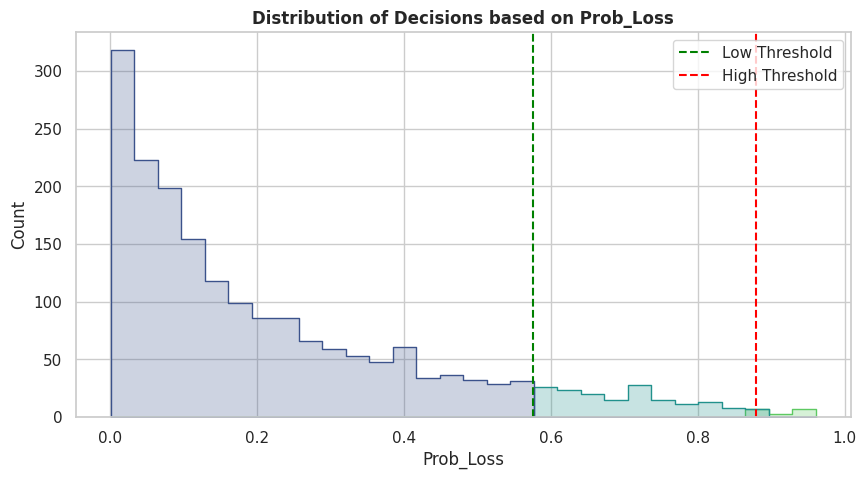

In [ ]:
# Setting thresholds for decision-making systems
#-------------------------------------
low_threshold = lower_bound_f
high_threshold = best_t_final

def decision_engine(prob):
    if prob < low_threshold:
        return "AUTO-PASS"
    elif prob > high_threshold:
        return "AUTO-REJECT"
    else:
        return "MANUAL REVIEW"

results_df = pd.DataFrame({
    'Actual': y_test,
    'Prob_Loss': y_prob_tuned
})
results_df['Decision'] = results_df['Prob_Loss'].apply(decision_engine)

# Summary of result
#-------------------------------------
decision_stats = results_df.groupby('Decision').agg(
    count=('Actual', 'count'),
    actual_loss_rate=('Actual', 'mean')
).reset_index()

hprint("<br>--- DECISION ENGINE STRATEGY REPORT ---<br>", bold=True)
print(f"Low Threshold: {low_threshold:.2f} | High Threshold: {high_threshold:.2f}")
print("-" * 60)
print(decision_stats.to_string(index=False))
print("-" * 60)


# Calculating the risk of error
#-------------------------------------
# Auto-Pass risk: The rate of cases that slip through the net is low (False Negative)
auto_pass_data = results_df[results_df['Decision'] == "AUTO-PASS"]
leakage_rate = auto_pass_data['Actual'].mean()

# Auto-Reject risk: The rate of incorrect case rejections (ProfitFalse Positive)
auto_reject_data = results_df[results_df['Decision'] == "AUTO-REJECT"]
mistake_reject_rate = 1 - auto_reject_data['Actual'].mean()

print(f"Loss rate within the AUTO-PASS: {leakage_rate:.2%}")
print(f"Mistaken rejection rate within the AUTO-REJECT: {mistake_reject_rate:.2%}")
print("\n")


# Result visualization
#-------------------------------------
plt.figure(figsize=(10, 5))
sns.histplot(data = results_df, x = 'Prob_Loss', hue = 'Decision', bins = 30, element = "step", palette = "viridis")
plt.axvline(low_threshold, color = 'green', linestyle = '--', label = 'Low Threshold')
plt.axvline(high_threshold, color = 'red', linestyle = '--', label = 'High Threshold')
plt.title("Distribution of Decisions based on Prob_Loss", fontweight = 'bold')
plt.legend()
plt.show()

<div style="
    background:#1f77b4;
    color:white;
    padding:10px;
    border-radius:12px;
    font-size:18px;
    font-weight:bold;
    margin:20px 0;
    text-align:left;
    width: 70%;
">
III. PACKAGE MODEL & BUILD THE AUTOMATICAL FLOW
</div>

<div style="
    background:#f2f2f2;
    padding:10px;
    border-radius:8px;
    font-size:18px;
    font-weight:bold;
    margin-top:10px;
    width: 50%;
">
1/ Package model
</div>

In [ ]:
try:
    # Encoding columns saved
    model_columns = list(X_train_reduced.columns)
    joblib.dump(model_columns, 'model_columns.pkl')

    # Model saved
    joblib.dump(best_model, 'logistic_model.pkl')

    # Category options saved
    category_options = {col: [str(x) for x in df[col].unique().tolist()] for col in features_input}
    category_options['campaign_id'] = ["campaign_id (ex: CP001)"]
    joblib.dump(category_options, 'category_options.pkl')

    print(f"✅ Saved successfully: model_columns.pkl, logistic_model.pkl, category_options.pkl")

except Exception as e:
    print(f"❌ Error when saving file: {e}")

✅ Saved successfully: model_columns.pkl, logistic_model.pkl, category_options.pkl


<div style="
    background:#f2f2f2;
    padding:10px;
    border-radius:8px;
    font-size:18px;
    font-weight:bold;
    margin-top:10px;
    width: 50%;
">
2/ Create automatic flow
</div>

In [ ]:
# Load configuration and display template
#-------------------------------------
def run_inference_flow():
    try:
        options_map = joblib.load('category_options.pkl')
        model_columns = joblib.load('model_columns.pkl')
        log_model = joblib.load('logistic_model.pkl')

        cols = ['campaign_id'] + [c for c in options_map.keys() if c != 'campaign_id']
        max_len = max(len(v) for v in options_map.values())
        template_df = pd.DataFrame({k: [str(i) for i in options_map[k]] + ['']*(max_len-len(options_map[k])) for k in cols})

        hprint("📋 FILE INPUT TEMPLATE:", bold = True)
        display(template_df)
        hprint("<br> <b>NTRODUCTON:</b> Instructions: Fill in all columns completely and in the correct format as shown in the sample file<br>")

        # File upload stream and automatic format checking
        #-------------------------------------
        uploaded = files.upload()
        if not uploaded: return

        raw_data = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))

        errors = []
        if raw_data.isnull().any().any():
            errors.append(f"❌ Null error on the lines: {raw_data[raw_data.isnull().any(axis=1)].index.tolist()}")

        for col, allowed in options_map.items():
            if col in raw_data.columns and col != 'campaign_id':
                invalid_mask = ~raw_data[col].astype(str).isin(allowed)
                if invalid_mask.any():
                    errors.append(f"❌ Column '{col}' incorrect formatting on the lines: {raw_data[invalid_mask].index.tolist()}")

        if errors:
            for err in errors: print(err)
            return

        # Encoding & Predict
        #-------------------------------------
        df_encoded = pd.get_dummies(raw_data.drop(columns=['campaign_id']))
        final_features = df_encoded.reindex(columns=model_columns, fill_value=0)
        prob_loss = log_model.predict_proba(final_features)[:, 1]

        # Extract loss driver
        #-------------------------------------
        coefs = pd.Series(log_model.coef_[0], index=model_columns).astype(float)
        drivers = []

        for i in range(len(final_features)):
            if prob_loss[i] > lower_bound_f:
                impact = final_features.iloc[i].astype(float) * coefs
                top_3 = impact.nlargest(3)
                driver_list = []
                for col_name, val in top_3.items():
                    if val > 0 and '_' in col_name:
                        base_col, value = col_name.rsplit('_', 1)
                        driver_list.append(f"{base_col}: {value}")
                drivers.append(" | ".join(driver_list))
            else:
                drivers.append("")

        # Summary of results
        #-------------------------------------
        result = raw_data.copy()
        result['Result'] = np.select([prob_loss > best_t_final, prob_loss > lower_bound_f],
                                    ['❌ REJECTED', '⚠️ RECONSIDERED!'], default='✅ PASSED')
        result['Potential_loss'] = prob_loss
        result['Loss_driver'] = drivers
        result = result[['campaign_id', 'Result', 'Potential_loss', 'Loss_driver'] + [c for c in raw_data.columns if c != 'campaign_id']]

        # Display with style
        #-------------------------------------
        def style_final(styler):
            styler.format({'Potential_loss': '{:.2%}'})
            def apply_styles(row):
                res = row['Result']
                if '❌' in res:
                    c, bg = '#B71C1C', '#FFEBEE'
                elif '⚠️' in res:
                    c, bg = '#F57F17', '#FFFDE7'
                else:
                    c, bg = '#1B5E20', 'transparent'

                return pd.Series({
                    'Result': f'color: {c}; font-weight: bold; white-space: nowrap;',
                    'Potential_loss': f'color: {c}; font-weight: bold; white-space: nowrap;',
                    'Loss_driver': f'color: {c}; font-weight: bold; background-color: {bg};'
                })
            return styler.apply(apply_styles, axis=1, subset=['Result', 'Potential_loss', 'Loss_driver'])

        hprint("\nCAMPAIGN RISK ANALYSIS RESULTS\n", bold = True)
        display(result.style.pipe(style_final))

    except Exception as e:
        print(f"❌ Configuration file loading error: {e}")
        return

run_inference_flow()

,campaign_id,campaign_objective,platform,ad_placement,device_type,operating_system,creative_format,creative_size,ad_copy_length,CTA,creative_emotion,target_audience_age,target_audience_gender,audience_interest_category,income_bracket,retargeting_flag,quarter,day_of_week,industry_vertical,budget_tier
0,campaign_id (ex: CP001),Lead Generation,Facebook,Search,Mobile,Android,Text,728x90,Short,False,Curiosity,45-54,Female,Shoppers,<$50K,False,1,Wednesday,E-commerce,High
1,,Engagement,Google Ads,Feed,Tablet,iOS,Image,320x50,Long,True,Neutral,65+,Male,Business Professionals,$50K-$100K,True,2,Friday,Finance,Medium
2,,Conversions,LinkedIn,Stories,Desktop,macOS,Video,1920x1080,Medium,,Urgency,35-44,All,Tech Enthusiasts,$100K-$200K,,3,Thursday,Healthcare,Low
3,,Brand Awareness,Twitter,Sidebar,,Windows,Carousel,300x250,,,Joy,25-34,,Students,>$200K,,4,Sunday,Education,
4,,App Installs,TikTok,In-Stream Video,,Other,Story,1080x1080,,,Trust,18-24,,Gamers,,,,Tuesday,SaaS,
5,,,Instagram,Display Network,,,Interactive,1200x628,,,Fear,55-64,,Health & Fitness,,,,Saturday,Gaming,
6,,,,,,,,,,,,,,,,,,Monday,,


Saving data_digital_backtest.csv to data_digital_backtest (1).csv


,campaign_id,Result,Potential_loss,Loss_driver,campaign_objective,platform,ad_placement,device_type,operating_system,creative_format,creative_size,ad_copy_length,CTA,creative_emotion,creative_age_days,target_audience_age,target_audience_gender,audience_interest_category,income_bracket,purchase_intent_score,retargeting_flag,start_date,quarter,day_of_week,hour_of_day,campaign_day,quality_score,actual_cpc,impressions,clicks,conversions,ad_spend,revenue,bounce_rate,avg_session_duration_seconds,pages_per_session,industry_vertical,budget_tier,CTR,CPC,conversion_rate,CPA,ROAS,profit
0,CAMP_00112,✅ PASSED,2.74%,,Brand Awareness,Google Ads,Display Network,Desktop,iOS,Video,320x50,Short,True,Neutral,74,18-24,Male,Business Professionals,>$200K,Low,False,2026-01-06,1,Tuesday,10,57,4,2.380000,21175,498,13,1185.240000,14771.440000,42.040000,95,3.870000,SaaS,Medium,2.352000,2.380000,2.610000,91.170000,12.460000,13586.200000
1,CAMP_00137,✅ PASSED,7.64%,,Lead Generation,Google Ads,Feed,Tablet,iOS,Video,1920x1080,Medium,True,Curiosity,62,18-24,Female,Students,$50K-$100K,Low,False,2026-01-03,1,Saturday,12,66,4,6.250000,38542,715,11,4468.750000,4384.090000,61.660000,37,2.050000,Healthcare,Medium,1.855000,6.250000,1.538000,406.250000,0.980000,-84.660000
2,CAMP_00174,✅ PASSED,2.84%,,Lead Generation,Google Ads,Feed,Mobile,Android,Video,300x250,Short,True,Urgency,7,45-54,Male,Business Professionals,>$200K,High,True,2026-01-18,1,Sunday,13,29,7,6.440000,6715,184,42,1184.960000,45766.390000,27.890000,168,5.730000,Healthcare,Low,2.740000,6.440000,22.826000,28.210000,38.620000,44581.430000
3,CAMP_00187,✅ PASSED,2.39%,,Conversions,Twitter,Feed,Desktop,Windows,Carousel,320x50,Short,True,Trust,1,18-24,All,Tech Enthusiasts,$50K-$100K,Medium,False,2026-01-02,1,Friday,15,40,7,1.730000,79741,5233,214,9053.090000,133164.160000,42.290000,82,4.040000,SaaS,High,6.562000,1.730000,4.089000,42.300000,14.710000,124111.070000
4,CAMP_00239,✅ PASSED,5.90%,,Conversions,Twitter,Display Network,Desktop,macOS,Text,1080x1080,Short,True,Urgency,13,45-54,Male,Students,$50K-$100K,Medium,False,2026-01-29,1,Thursday,1,42,6,2.430000,7507,103,1,250.290000,222.530000,61.640000,42,3.210000,E-commerce,Medium,1.372000,2.430000,0.971000,250.290000,0.890000,-27.760000
5,CAMP_00278,✅ PASSED,16.29%,,Conversions,Twitter,Feed,Mobile,Android,Carousel,300x250,Medium,True,Joy,11,18-24,Female,Health & Fitness,<$50K,Medium,False,2026-01-09,1,Friday,20,87,4,1.330000,5000,194,4,258.020000,2639.320000,31.840000,170,1.250000,Finance,Low,3.880000,1.330000,2.062000,64.500000,10.230000,2381.300000
6,CAMP_00288,✅ PASSED,26.83%,,Lead Generation,Google Ads,Feed,Mobile,Android,Image,1920x1080,Short,True,Urgency,49,45-54,Female,Gamers,$50K-$100K,Medium,False,2026-01-17,1,Saturday,16,59,8,1.730000,21133,227,7,392.710000,5137.320000,48.780000,130,1.810000,Healthcare,Medium,1.074000,1.730000,3.084000,56.100000,13.080000,4744.610000
7,CAMP_00300,✅ PASSED,44.90%,,Brand Awareness,Twitter,Feed,Mobile,iOS,Image,728x90,Medium,True,Trust,23,35-44,All,Tech Enthusiasts,<$50K,Medium,True,2026-01-10,1,Saturday,1,20,8,2.380000,49235,1315,17,3129.700000,5447.900000,51.720000,161,4.420000,Healthcare,Low,2.671000,2.380000,1.293000,184.100000,1.740000,2318.200000
8,CAMP_00349,✅ PASSED,17.61%,,Lead Generation,Facebook,In-Stream Video,Mobile,iOS,Video,300x250,Medium,False,Urgency,79,18-24,All,Business Professionals,$50K-$100K,Low,False,2026-01-30,1,Friday,15,4,3,3.050000,79186,1453,13,4431.650000,5145.920000,73.420000,116,2.880000,Education,Low,1.835000,3.050000,0.895000,340.900000,1.160000,714.270000
9,CAMP_00436,✅ PASSED,22.62%,,Conversions,Facebook,Search,Mobile,Windows,Image,1920x1080,Long,True,Trust,13,25-34,All,Health & Fitness,<$50K,High,False,2026-01-21,1,Wednesday,9,75,5,1.560000,45677,702,17,1095.120000,3594.550000,31.220000,117,4.150000,E-commerce,Medium,1.537000,1.560000,2.422000,64.420000,3.280000,2499.430000


<div style="
    background:#1f77b4;
    color:white;
    padding:10px;
    border-radius:12px;
    font-size:18px;
    font-weight:bold;
    margin:20px 0;
    text-align:left;
    width: 70%;
">
IV. TEST THE EFFECTIVENESS OF THE MODEL
</div>

In [ ]:
# Load configuration & Set parameters
#-------------------------------------
try:
    log_model = joblib.load('logistic_model.pkl')
    model_columns = joblib.load('model_columns.pkl')

    low_threshold = lower_bound_f
    high_threshold = best_t_final

    print(f"✅ Model successfully loaded")
    print(f"📌 Operating threshold: Low: {low_threshold:.4f} | High: {high_threshold:.4f}")
except Exception as e:
    print(f"❌ Error: Check pkl files or threshold variables. Details: {e}")


# Run predictions for backtest data (1 month later)
#-------------------------------------
df_final_report = df_backtest.copy()

df_bt_encoded = pd.get_dummies(df_final_report.drop(columns=['campaign_id'], errors='ignore'))

df_bt_features = df_bt_encoded.reindex(columns=model_columns, fill_value=0)

y_prob_backtest = log_model.predict_proba(df_bt_features)[:, 1]

# Decision Engine
df_final_report['Prob_Loss'] = y_prob_backtest
df_final_report['Decision'] = np.select(
    [df_final_report['Prob_Loss'] < low_threshold,
     df_final_report['Prob_Loss'] > high_threshold],
    ['AUTO-PASS', 'AUTO-REJECT'],
    default='MANUAL REVIEW'
)

df_final_report['Actual_Status'] = (df_final_report['profit'] <= 0).astype(int)


# Run predictions for backtest data (1 month later)
#-------------------------------------
categories = pd.DataFrame({'Decision': ['AUTO-PASS', 'MANUAL REVIEW', 'AUTO-REJECT']})

volume_stats = df_final_report.groupby('Decision').agg(
    Total_Campaigns = ('Actual_Status', 'count'),
    Actual_profit = ('Actual_Status', lambda x: (x == 0).sum()),
    Actual_loss = ('Actual_Status', lambda x: (x == 1).sum())
).reset_index()

# Merge to ensure the REJECT group is always present, even when the number is zero
volume_stats = categories.merge(volume_stats, on='Decision', how='left').fillna(0)
volume_stats['%_of_Total'] = volume_stats['Total_Campaigns'] / len(df_final_report)


# Drift analysis
#-------------------------------------
expected_stats = results_df.groupby('Decision')['Actual'].mean().rename('Loss_Rate_Expected')
actual_loss_stats = df_final_report.groupby('Decision')['Actual_Status'].mean().rename('Loss_Rate_Actual')

comparison_df = pd.concat([expected_stats, actual_loss_stats], axis=1).fillna(0)
comparison_df['Drift'] = comparison_df['Loss_Rate_Actual'] - comparison_df['Loss_Rate_Expected']

# Profit caculation
profit_no_system = df_final_report['profit'].sum()
profit_with_system = df_final_report[df_final_report['Decision'] == 'AUTO-PASS']['profit'].sum()
profit_hybrid = df_final_report[df_final_report['Decision'] != 'AUTO-REJECT']['profit'].sum()
lift = profit_with_system - profit_no_system


# Summary of results
#-------------------------------------
print("\n" + "="*85)
hprint("BACKTEST REVIEW", bold = True)
print("="*85)

hprint("<br>[SEC 1] STATISTICS ON QUANTITY AND ACTUAL STATUS", bold = True)
display(volume_stats.style.format({
    'Total_Campaigns': '{:,.0f}',
    'Actual_profit': '{:,.0f}',
    'Actual_loss': '{:,.0f}',
    '%_of_Total': '{:.1%}'
}))

hprint("<br><br>[SEC 2] RECONCILE LOSS RATIO (DRIFT ANALYSIS)", bold = True)


display(comparison_df.style.format("{:.2%}"))

hprint("<br><br>[SEC 3] BUSINESS IMPACT ANALYSIS (PROFIT)", bold = True)
print("\n"f"Profit BAU:                                          ${profit_no_system:,.0f}")
print(f"Automated approval (excluding manual reviews):       ${profit_with_system:,.0f}")
print("-" * 55)
print(f"INCREASED PROFITS (LIFT):                            ${lift:,.0f}")

if profit_no_system != 0:
    improvement = (lift / abs(profit_no_system)) * 100
    print(f"Effectiveness compared to the original:          {improvement:.2f}%")

✅ Model successfully loaded
📌 Operating threshold: Low: 0.5758 | High: 0.8788



,Decision,Total_Campaigns,Actual_profit,Actual_loss,%_of_Total
0,AUTO-PASS,396,337,59,92.3%
1,MANUAL REVIEW,30,6,24,7.0%
2,AUTO-REJECT,3,1,2,0.7%


,Loss_Rate_Expected,Loss_Rate_Actual,Drift
Decision,,,
AUTO-PASS,15.70%,14.90%,-0.81%
AUTO-REJECT,100.00%,66.67%,-33.33%
MANUAL REVIEW,77.11%,80.00%,2.89%



Profit BAU:                                          $9,090,463
Automated approval (excluding manual reviews):       $9,105,702
-------------------------------------------------------
INCREASED PROFITS (LIFT):                            $15,239
Effectiveness compared to the original:          0.17%


<div style="
    background:#f3f9fe;
    border-left:6px solid #1f77b4;
    padding:12px;
    border-radius:6px;
    font-size:15px;
    font-weight:400;
    margin:10px;
"><strong>1. Risk Classification Effectiveness</strong><br><br>

- Accuracy of Filtering: The AUTO-PASS group accounted for the majority (92.3%) with an actual loss rate of only 14.90%, lower than the expected rate (15.70%).

- Identification of Risk Areas: The MANUAL REVIEW and AUTO-REJECT groups concentrated cases with extremely high actual loss rates (80% and 66.67%, respectively). This shows that the model effectively separates safe and risky groups.<br><br>

<strong>2. Model Stability (Drift Analysis)</strong>
- Low Error: The Drift index in the AUTO-PASS group was very small (-0.81%), demonstrating that the model's forecast closely matched actual operations.

- Variance in the Reject Group: The AUTO-REJECT group had a large deviation (-33.33%), but due to the small sample size (only 3 cases), this number did not significantly affect the overall picture. 3. Economic Impact
The adoption of the model resulted in an increase in profits of $15,239 (excluding cases currently RECONSIDERED) while reducing time and resources by 93%.
</div>